# Introduction to neural network classification with tensorflow

A few types of classification
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [183]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [184]:
# Check the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [185]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Right now our data is a bit hard to understand right now so lets visualize it

In [186]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [187]:
circles["Label"].value_counts()

1    500
0    500
Name: Label, dtype: int64

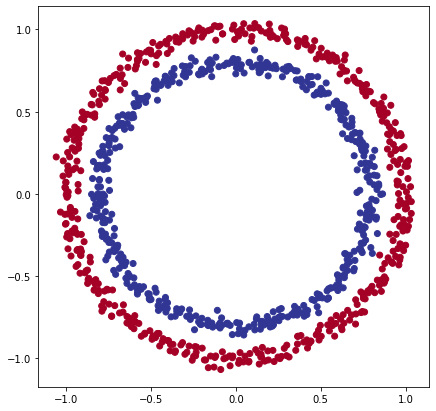

In [188]:
# Visualize with a plot

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu);

### Input and Output shapes

In [189]:
# Check the features and labels shapes

X.shape, y.shape

((1000, 2), (1000,))

In [190]:
# How many samples we're working with

len(X), len(y)

(1000, 1000)

In [191]:
# Viewing an example for feature and labels
X[9], y[9]

(array([-0.1214858 ,  1.02150905]), 0)

In [192]:
X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

### Steps in modelling

The steps in modelling with tensorflow are:
1. Create or import a model
2. Compile a model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate ...
 

In [193]:
import tensorflow as tf
#Importing tensorflow

tf.__version__

'2.4.1'

In [194]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ]
)


# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 946us/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 964us/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 943us/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 927us/step - loss: 0.6937 - accuracy: 0.5157


In [195]:
# Let's try and improve our model by training it for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 994us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since our model isnt performing well (with an accuracy of 0.5) so let's increase the no. of layers

In [196]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
    ]
)

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1799 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7253 - accuracy: 0.5082
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7301 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.5047
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.4901
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4869
Epoch 8/100
32/32 [==============================] - 0s 989us/step - loss: 0.6942 - accuracy: 0.5184
Epoch 9/100
32/32 [==============================] - 0s 991us/step - loss: 0.6988 - accuracy: 0.4955
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5077
Epoch

In [197]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

### Improving our model

1. Create the model - Increase the number of layers of increase the number oof hidden units in each layer or change the activation functions
2. Compiling the model - We might choose a different optimizer eg. Adam instead of SGD
3. Fit the model - Increase the number of epochs


<br>

Some hyperparameters that cpuld be changed are:
1. Adding layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the learning rate
5. Fit on more data
6. Fit for longer

In [198]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (with 3 layers)
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)


# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model

model_3.fit(X, y, verbose=0, epochs=100)

In [199]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

To visualize our model's predictions let's create a function `plot_decision_boundary()`

* Take the traned model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls)


In [200]:
import numpy as np

In [201]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """

    # Defining the axis boundary of the plot and create a meshgrid

    x_min, m_max = X[:,0].min() -0.1, X[:,0].max() +0.1
    y_min, y_max = X[:,1].min() -0.1, X[:,1].max() +0.1

    xx, yy = np.meshgrid(np.linspace(x_min, m_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to make predictions on it)

    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2 D array
    

    # Make predictions

    y_pred = model.predict(x_in)


    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


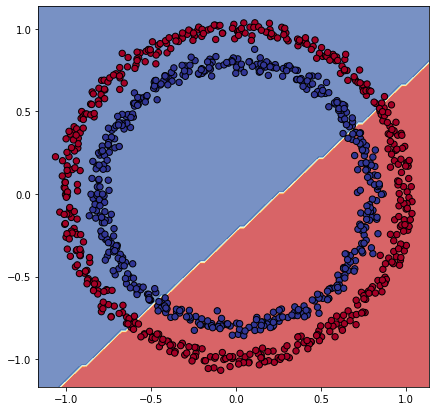

In [202]:
# Check out the predictions aour model is making

plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

Let's build a regression model to fit this data, because the classification showed a linear bifurcation of values

In [203]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100,1100, 5)  ## X = Y+100

# Split data into training and testing data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# model_3.fit(X_reg_train, y_reg_train, epochs = 100)  

this willl give error
That's because the model was comiled to have a loss function of Binarycrossentropy
Which is for classification (Binary)

In [204]:
# Building the model now from scratch (but similar)

# Set up random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),
    ]
)

# 2. Compile the model

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

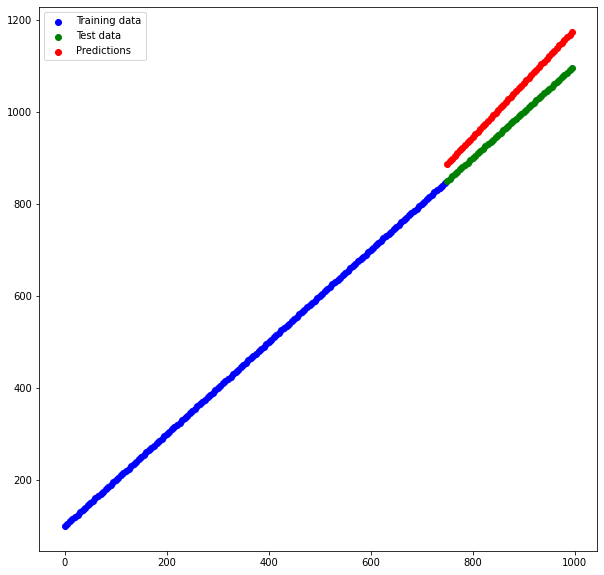

In [205]:
# make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10,10))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

The one thing we can understand from the classification and regression model here is that the model is definately something. That is obvious from the predictions from the regression model(model_4)
But the classification model hasn't predicted correctly, in fact the classification of the datapoints were done linearly on a straight line. (as seen from the plot)

So what we don't have right now is `non-linearity` of the model. We haven't introduced that to the model yet

We're now recreating some examples from the tensorflow playground

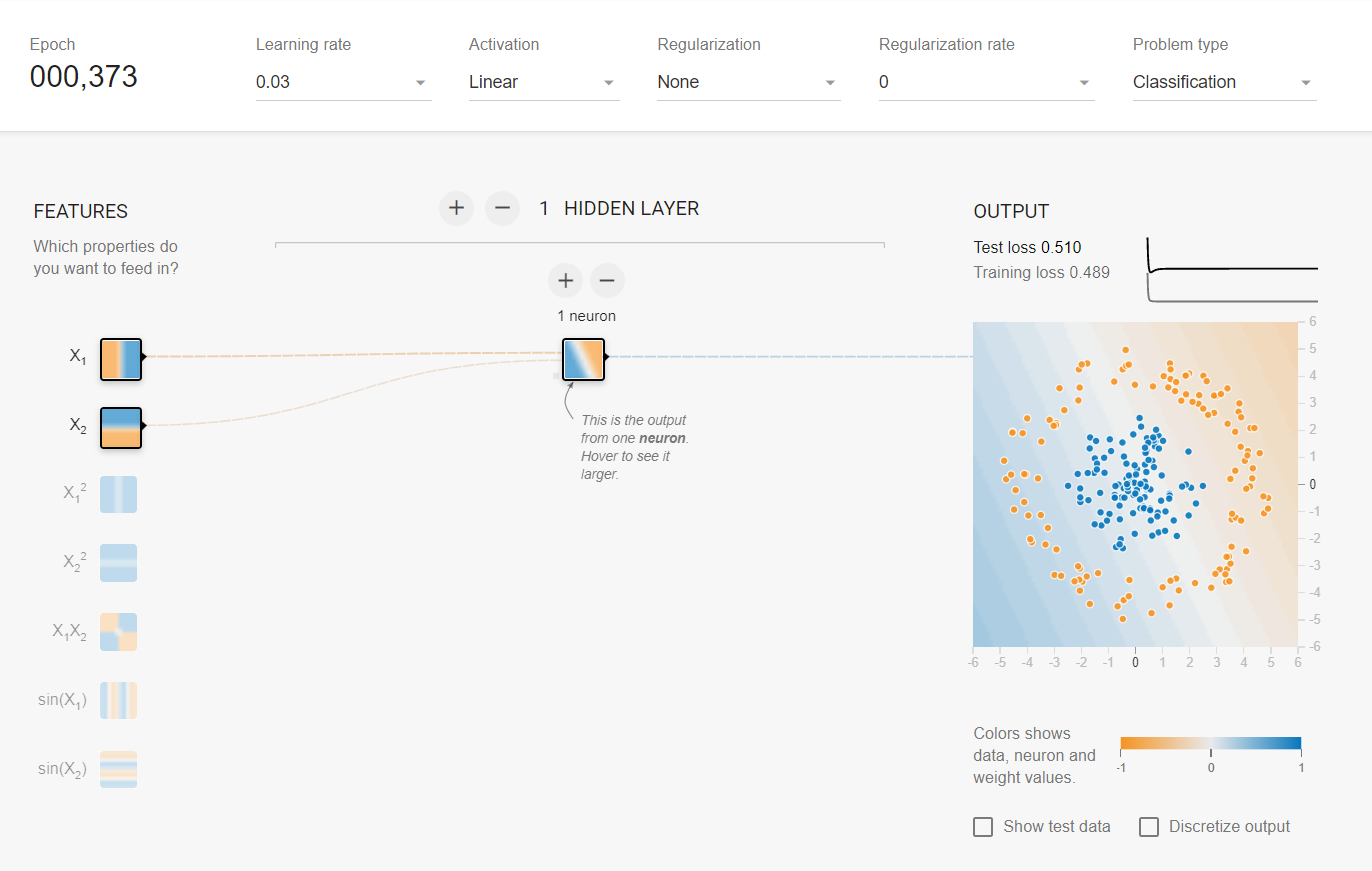

In [206]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ]
)

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 973us/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 992us/step - loss: 3.5803 - accuracy: 0.4409
Epoch

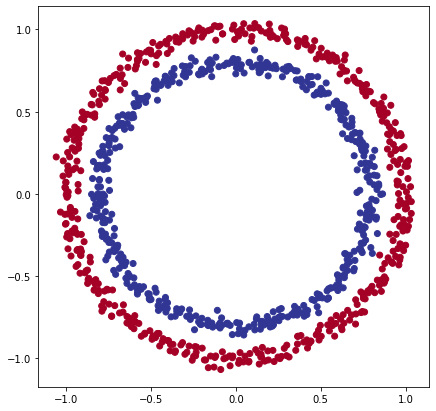

In [207]:
# Check out our data
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


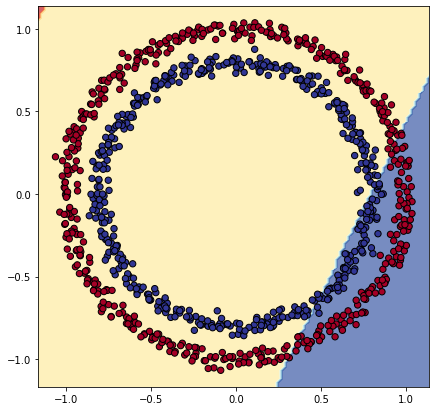

In [208]:
# Check the decision boundary for ot model_4

plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

On Own

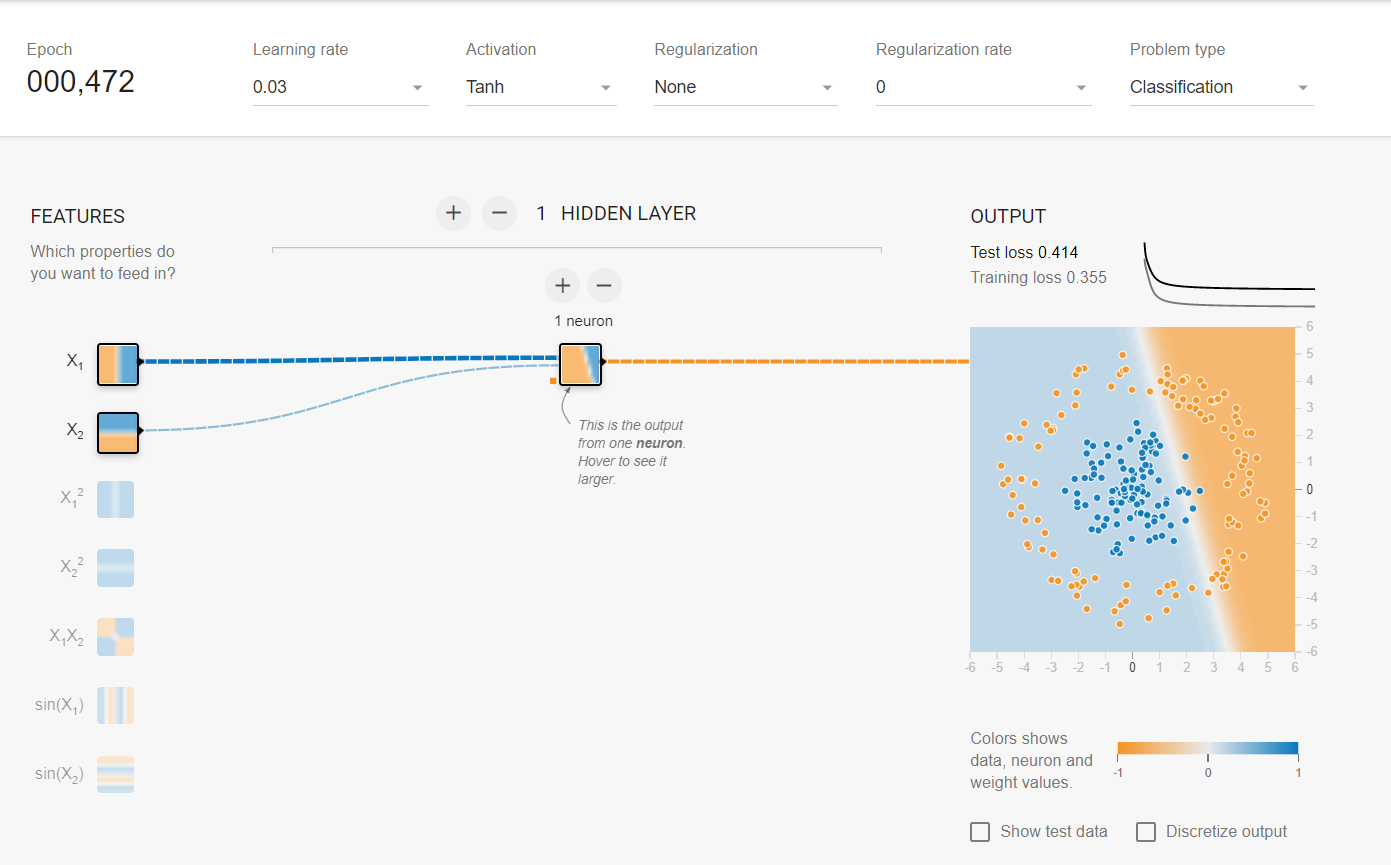

In [209]:
# Set random seed
tf.random.set_seed(42)

# Create the model
onown1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
historyonown1 = onown1.fit(X ,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6209 - accuracy: 0.4828
Epoch 2/100
32/32 [==============================] - 0s 965us/step - loss: 4.3064 - accuracy: 0.4799
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5247 - accuracy: 0.4673
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0579 - accuracy: 0.4689
Epoch 5/100
32/32 [==============================] - 0s 962us/step - loss: 4.2364 - accuracy: 0.4423
Epoch 6/100
32/32 [==============================] - 0s 955us/step - loss: 3.8179 - accuracy: 0.4816
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0326 - accuracy: 0.4451
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6288 - accuracy: 0.4376
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8620 - accuracy: 0.4019
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5572 - accuracy: 0.4555
Epo

doing binary classification


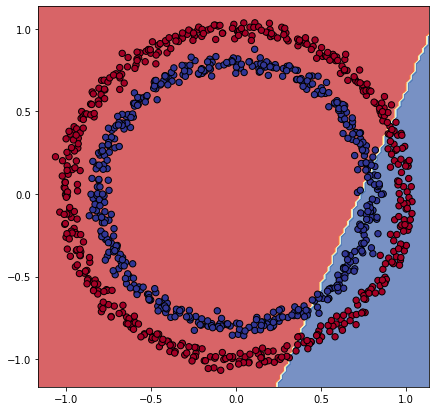

In [210]:
plot_decision_boundary(onown1, X, y)

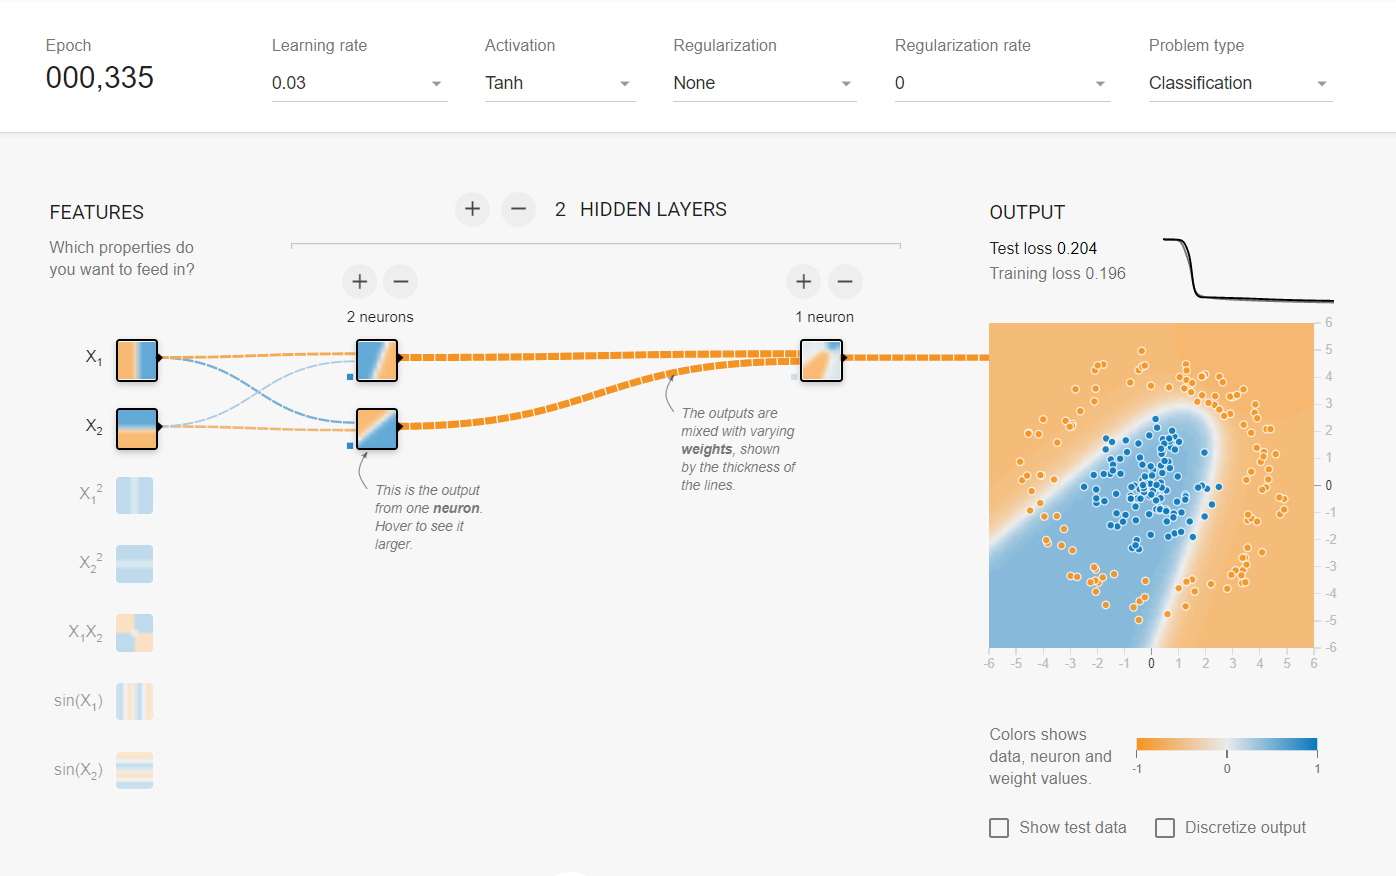

In [211]:
# Set random seed
tf.random.set_seed(42)

# Create the model
onown2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
historyonown2 = onown2.fit(X ,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7021 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1953 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1124 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5415 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3139 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4958 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2938 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9867 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0028 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9093 - accuracy: 0.5161
Epoch 11/

doing binary classification


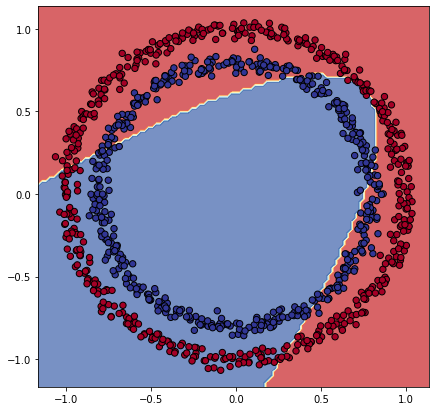

In [212]:
plot_decision_boundary(onown2, X, y)

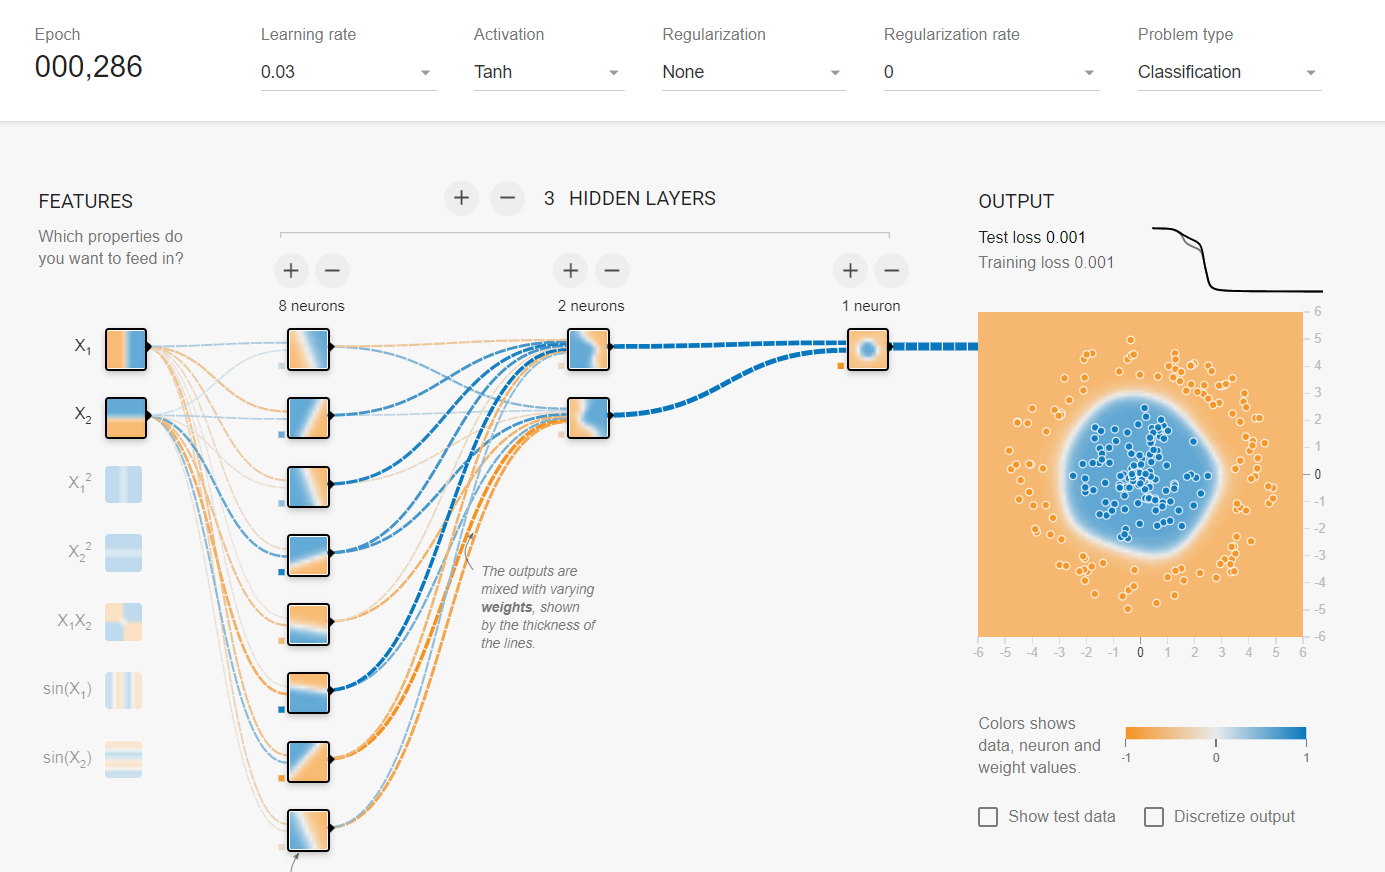

In [213]:
# Set random seed
tf.random.set_seed(42)

# Create the model
onown3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
historyonown3 = onown3.fit(X ,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.0342 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1281 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9689 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8944 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8581 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7646 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7497 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7458 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7112 - accuracy: 0.5161
Epoch 11/

doing binary classification


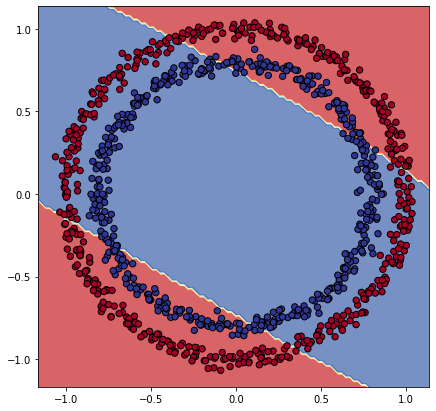

In [214]:
plot_decision_boundary(onown3, X, y)

In [215]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    ]
)

# Compile the model
onown4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown4 = onown4.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 1.1320 - accuracy: 0.4489
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.1611
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7578 - accuracy: 0.4513
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7414 - accuracy: 0.2809
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.3403
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7061 - accuracy: 0.4422
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5325
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.6911
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.7987
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.9770
Epoch 11/

doing binary classification


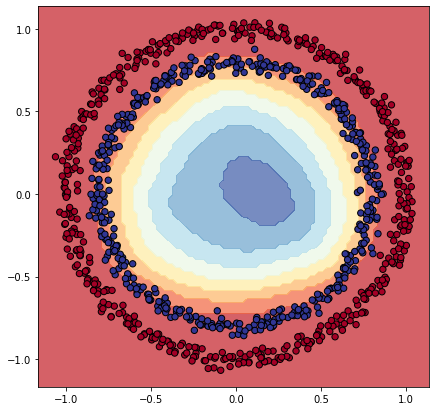

In [216]:
plot_decision_boundary(onown4, X, y)

In [217]:
onown4.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_154 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_155 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_156 (Dense)            (None, 2)                 22        
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 3         
Total params: 5,885
Trainable params: 5,885
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.7177 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4839
Epoch 11/

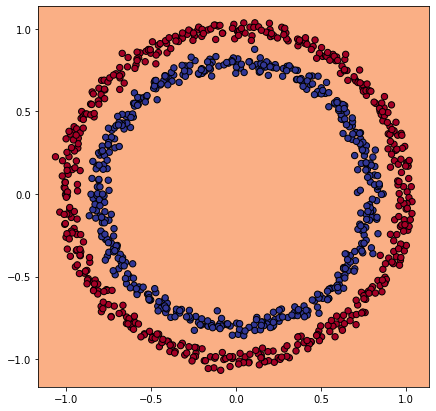

In [218]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown5 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

# Compile the model
onown5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown5 = onown5.fit(X, y, epochs=200)

plot_decision_boundary(onown5, X, y)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 3.8826 - accuracy: 0.4605
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 1.1591 - accuracy: 0.4755
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7112 - accuracy: 0.4499
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.4951
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4826
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5287
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5163
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5416
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5154
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5433
Epoch 11/

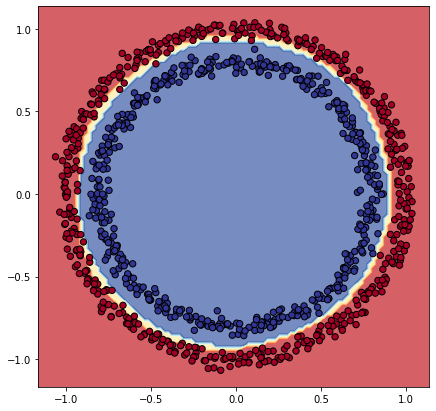

In [219]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown6 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown6 = onown6.fit(X, y, epochs=200)

plot_decision_boundary(onown6, X, y)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

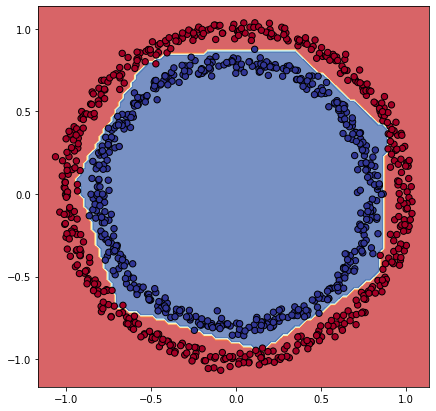

In [220]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown7 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

# Compile the model
onown7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown7 = onown7.fit(X, y, epochs=200)

plot_decision_boundary(onown7, X, y)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.4839
Epoch 11/

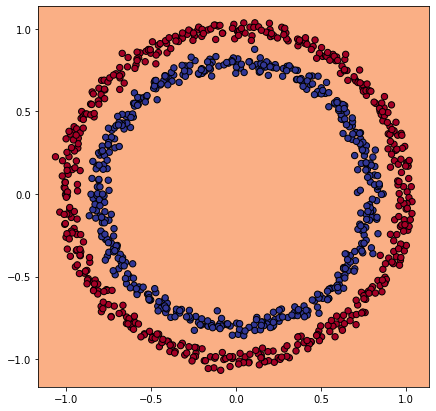

In [221]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown8 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ]
)

# Compile the model
onown8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown8 = onown8.fit(X, y, epochs=200)

plot_decision_boundary(onown8, X, y)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.4839
Epoch 11/

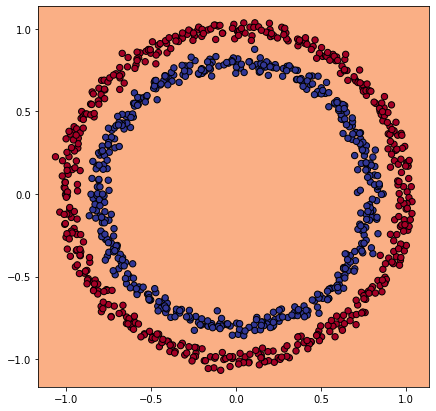

In [222]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown9 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ]
)

# Compile the model
onown9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown9 = onown9.fit(X, y, epochs=200)

plot_decision_boundary(onown9, X, y)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6995 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.4839
Epoch 11/

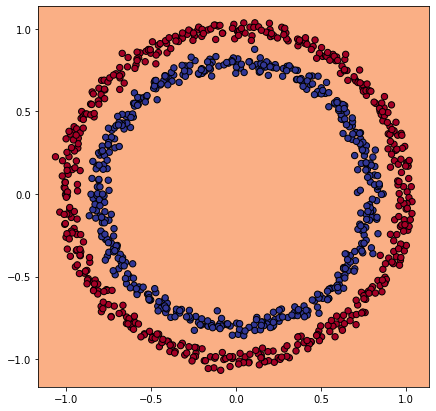

In [223]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown10 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ]
)

# Compile the model
onown10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown10 = onown10.fit(X, y, epochs=200)

plot_decision_boundary(onown10, X, y)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.5088
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5109
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5395
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5311
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.4971
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5332
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5719
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5784
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6024
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5510
Epoch 11/

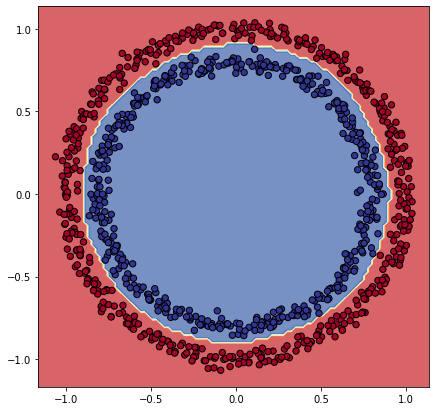

In [224]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown11 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

# Compile the model
onown11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown11 = onown11.fit(X, y, epochs=100)

plot_decision_boundary(onown11, X, y)

On own end

**Note:** The combination of linear (straight lines) and non-linear (non-straight) lines or functions is the key to the fundamentals of neural networks

In [225]:
# Create a toy tensor (vey similar to the data we pass into iur model)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

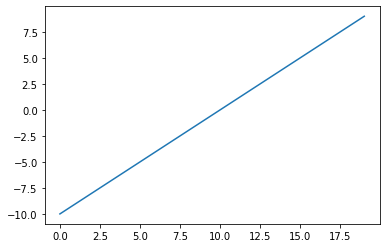

In [226]:
# Visualize our toy tensor
plt.plot(A);

In [227]:
# Let's try by replicating sigmoid - 1 / (1+ exp(-x))

def sigmoid(x):
    return 1 / (1+tf.exp(-x))

# Use sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

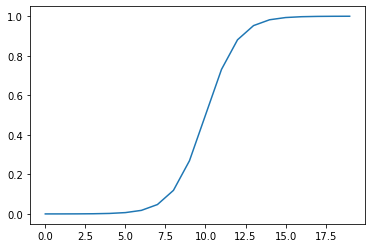

In [228]:
# Plot our toy tensor transormed by sigmoid 
plt.plot(sigmoid(A));

In [229]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5399931e-05, 1.2338161e-04, 3.3542514e-04, 9.1105700e-04,
       2.4726391e-03, 6.6929162e-03, 1.7986238e-02, 4.7425866e-02,
       1.1920291e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966455e-01, 9.9987662e-01],
      dtype=float32)>

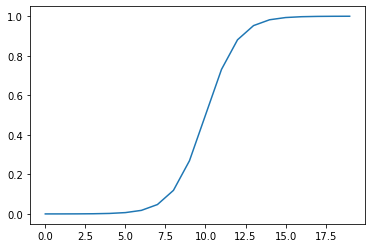

In [230]:
plt.plot(tf.keras.activations.sigmoid(A))

In [231]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

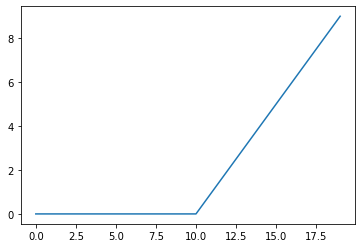

In [232]:
plt.plot(relu(A));

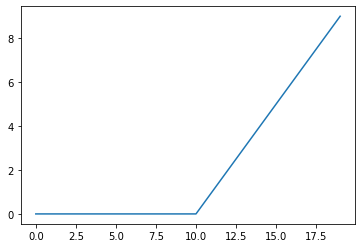

In [233]:
plt.plot(tf.keras.activations.relu(A));

In [234]:
# Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

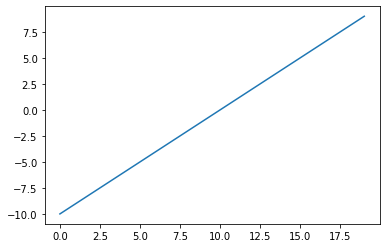

In [235]:
plt.plot(tf.keras.activations.linear(A))

### Evaluating and improving our classification


Till now we have been trainig and testing on the same dataset (theerby committing a sin)
Hence let's create a training and testing set

In [236]:
len(X)

1000

In [237]:
# Slpit into train and test sets
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
X_train.shape, y_train.shape, X.shape, y.shape

((800, 2), (800,), (1000, 2), (1000,))

In [240]:
# Let's recreate a model to fit on training data and evaluate on test data

# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])


# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5343
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5528
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.5707
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.5852
Epoch 5/25
25/25 [==============================] - 0s 983us/step - loss: 0.6604 - accuracy: 0.5739
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.6207
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6297
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.7071
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.7338
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7815
Epoch 11/25
25/25

In [241]:
# Evaluate the model on test data set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

doing binary classification
doing binary classification


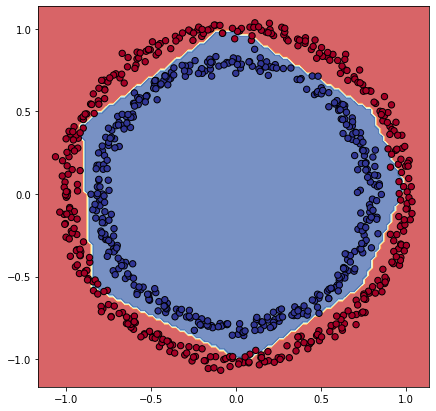

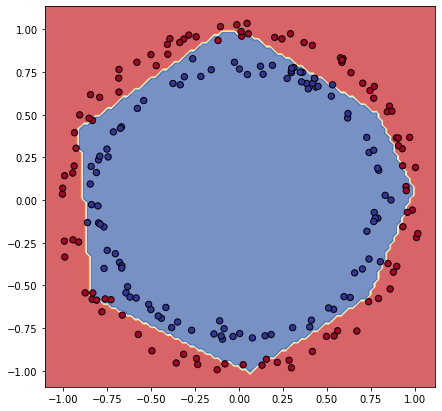

In [242]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_8, X_train, y_train)

plot_decision_boundary(model_8, X_test, y_test)

### Plot the loss (or training) curves

In [243]:
history_8.history

{'accuracy': [0.5637500286102295,
  0.5649999976158142,
  0.5762500166893005,
  0.5724999904632568,
  0.5712500214576721,
  0.59375,
  0.6274999976158142,
  0.6962500214576721,
  0.7212499976158142,
  0.7674999833106995,
  0.8025000095367432,
  0.8687499761581421,
  0.8974999785423279,
  0.9162499904632568,
  0.9412500262260437,
  0.9674999713897705,
  0.9587500095367432,
  0.9762499928474426,
  0.9737499952316284,
  0.9750000238418579,
  0.9574999809265137,
  0.9775000214576721,
  0.9775000214576721,
  0.9850000143051147,
  0.9637500047683716],
 'loss': [0.6823503971099854,
  0.6749704480171204,
  0.6679719686508179,
  0.6634892821311951,
  0.6591553688049316,
  0.6474893689155579,
  0.631162166595459,
  0.6093025803565979,
  0.5843716263771057,
  0.5442498922348022,
  0.4914669692516327,
  0.4314340353012085,
  0.3877747058868408,
  0.3405437469482422,
  0.30260783433914185,
  0.262625515460968,
  0.23670434951782227,
  0.21137741208076477,
  0.19696930050849915,
  0.1778701990842819

In [244]:
# Convert the histroy objevt into dataframe
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
5,0.647489,0.59375
6,0.631162,0.62750
7,0.609303,0.69625
8,0.584372,0.72125
9,0.544250,0.76750


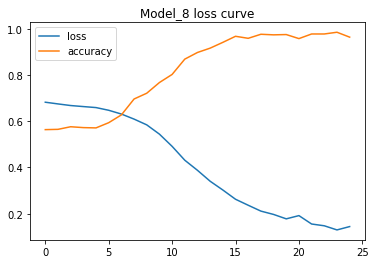

In [245]:
# Plot the loss Curves

pd.DataFrame(history_8.history).plot()
plt.title("Model_8 loss curve");

For many problems, the loss function going down means the model is improving 

### Finding the best Learning rate

To find the ideal learning rate ( the learning rate where the loss decresesthe most during training) we're going to use the following steps:
* A learning rate **callback** - it's an extra piece of functionality we can add during training.
* Another model 
* A modified loss curve plots

In [246]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit the model (passing the lr_scheduer)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5021
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5130
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4774
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.4613
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4898
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5203
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5148
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.4975
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5101
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.4962
Epoch 11/

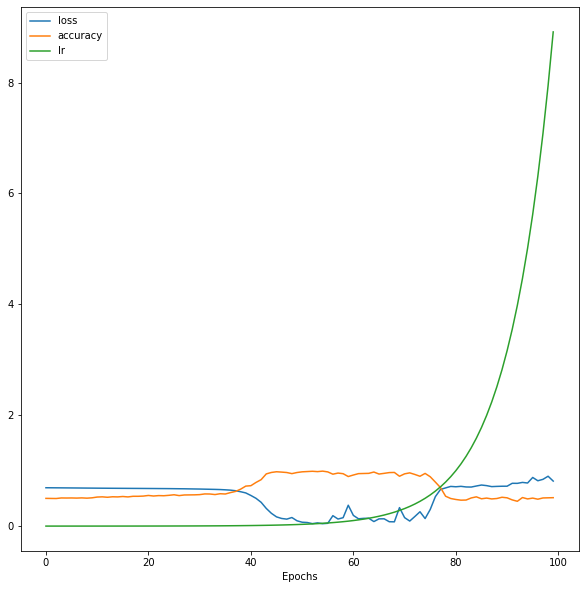

In [247]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,10), xlabel="Epochs")

In [248]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [249]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate versus loss')

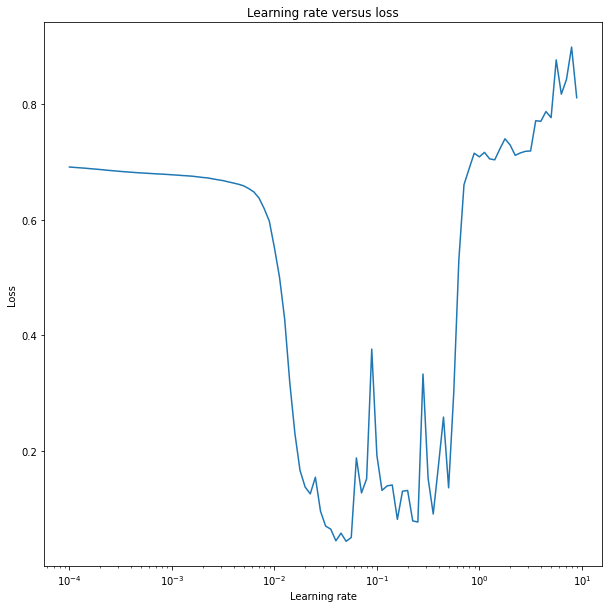

In [250]:
plt.figure(figsize=(10,10))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate versus loss")

In [251]:
# Examples of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001, 0.0001)

In [252]:
# The model seems to be performing best when lr is between 0.01 and o.1...somewhere close to 0.02
# 0.02

In [253]:
# Let's try using a higher learning rate

# Set random seed
tf.random.set_seed(42)


# Create the model
model_10 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


# Compile the model with a higher learning rate (lr=0.02)
model_10.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(lr=0.02),
                  metrics=["accuracy"])


# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5608
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5503
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5716
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.6603
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.6852
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7168
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8404
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.9186
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9336
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.9352
Epoch 11/20
25/25 [

In [254]:
# Evaluate the model_10 on the test data

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504592895507812, 0.9100000262260437]

In [255]:
# Evaluate the model_8 on the test data

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

The model_10 las a lower loss value as compared to model_8, bacause we increased the learning rate slightly and it also takes lesser epochs to do so (20 in model_10 and 25 in model_8)

doing binary classification
doing binary classification


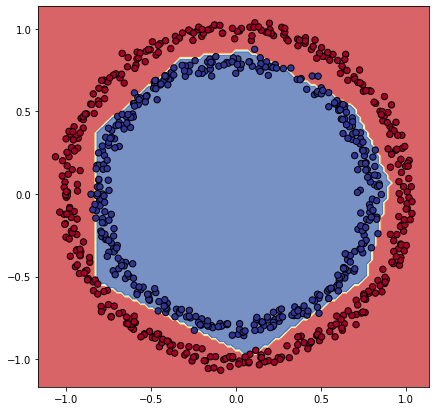

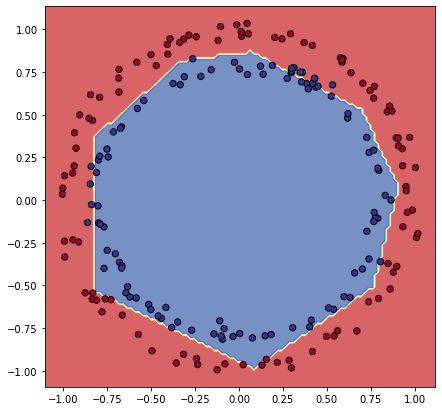

In [257]:
plot_decision_boundary(model_10, X_train, y_train)
plot_decision_boundary(model_10, X_test, y_test)

### More classification evaluation methods

Apart from visualizations, there are a few other metrics we should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from 
scikit-learn)

In [260]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test data : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100
Model loss on test data : 0.21504592895507812
Model accuracy on the test set : 91.00%


How about a confusion matrix?

In [270]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

#Create confusion matrix
# confusion_matrix(y_test, y_preds) 
# This will give error, as the y_preds will give prediction probability (as decimals) which is a standard output from sigmoid (or softmax) activation function

In [271]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [272]:
y_preds[:10]

array([[9.3463719e-01],
       [8.5691512e-03],
       [9.8140264e-01],
       [9.2455745e-04],
       [6.1867726e-01],
       [6.9378287e-01],
       [4.1258335e-04],
       [1.0053813e-03],
       [9.2127585e-01],
       [5.6455433e-03]], dtype=float32)

In [273]:
# Convert the predictions to binay format and view the firt 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [274]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [17, 83]])

How about we prettify our confusion matrix

The following code we're about to write is a remix of scikit-learn's plot_confusion_matrix(). But because that function works with estimator (sklearn model) and we are working with tensorflow we are going to adapt the code for it

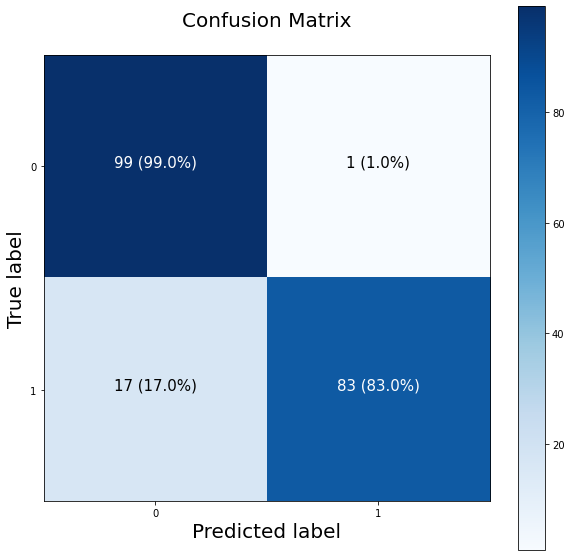

In [279]:
# https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/metrics/_plot/confusion_matrix.py#L168

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)